The project aims to predict the selling price of used cars using machine learning techniques. We'll preprocess the dataset, encode categorical variables, train two models (Linear Regression and Lasso Regression), and evaluate their performance. Additionally, we will use visualizations to compare actual and predicted prices to understand model performance better.

In [1]:
#IMPORTING NECESSARY DEPENDENCIES AND LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

In [2]:
#LOADING THE DATASET
dataset = pd.read_csv('/content/car data.csv')

In [5]:
#CHECKING FIRST AND LAST FIVE ROWS OF DATASET

dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [8]:
#NUMBER OF ROWS AND COLUMN
dataset.shape

(301, 9)

In [9]:
#INFORMATION ABOUT DATASET
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
#CHECKING NULL VALUES
print("\nMissing values in each column:")
dataset.isnull().sum()


Missing values in each column:


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [12]:
#CHECKING THE DISTRIBUTION OF CATEGORICAL DATA
print("\nDistribution of Categorical Data:")
print("Seller_Type:", dataset.Seller_Type.value_counts())
print("Transmission:", dataset.Transmission.value_counts())
print("Fuel_Type:", dataset.Fuel_Type.value_counts())


Distribution of Categorical Data:
Seller_Type: Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission: Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Fuel_Type: Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [13]:
#ENCODING THE CATEGORICAL VARIABLES
dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

<ipython-input-13-cdad747965b7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
<ipython-input-13-cdad747965b7>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
<ipython-input-13-cdad747965b7>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fa

In [14]:
#DISPLAYING THE UPDATED DATASET
print(dataset.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  


In [15]:
# Splitting the data into features (X) and target (Y)
X = dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = dataset['Selling_Price']

In [16]:
print("\nFeature matrix (X):")
print(X.head())
print("\nTarget variable (Y):")
print(Y.head())


Feature matrix (X):
   Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0  2014           5.59       27000          0            0             0   
1  2013           9.54       43000          1            0             0   
2  2017           9.85        6900          0            0             0   
3  2011           4.15        5200          0            0             0   
4  2014           6.87       42450          1            0             0   

   Owner  
0      0  
1      0  
2      0  
3      0  
4      0  

Target variable (Y):
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [17]:
#SPLITTING THE DATA INTO TRAINING AND TESTING SET
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [18]:
# Displaying dataset shapes
print("\nShapes of datasets:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)


Shapes of datasets:
X_train: (240, 7) X_test: (61, 7)


In [20]:
 #Function to visualize actual vs predicted prices
def visualize_predictions(actual, predicted, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=actual, y=predicted, alpha=0.6, edgecolor='b')
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', linewidth=2)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(title)
    plt.show()

**MODEL1 : LINEAR REGRESSION**

In [21]:
print("\n--- Linear Regression Model ---")
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)


--- Linear Regression Model ---


LinearRegression()

In [22]:
# Evaluating Linear Regression model
train_pred_lr = lin_reg_model.predict(X_train)
test_pred_lr = lin_reg_model.predict(X_test)

In [23]:
train_r2_lr = metrics.r2_score(Y_train, train_pred_lr)
test_r2_lr = metrics.r2_score(Y_test, test_pred_lr)

In [24]:
print("Training R-squared score:", train_r2_lr)
print("Testing R-squared score:", test_r2_lr)

Training R-squared score: 0.8838169193709796
Testing R-squared score: 0.8401532365377697


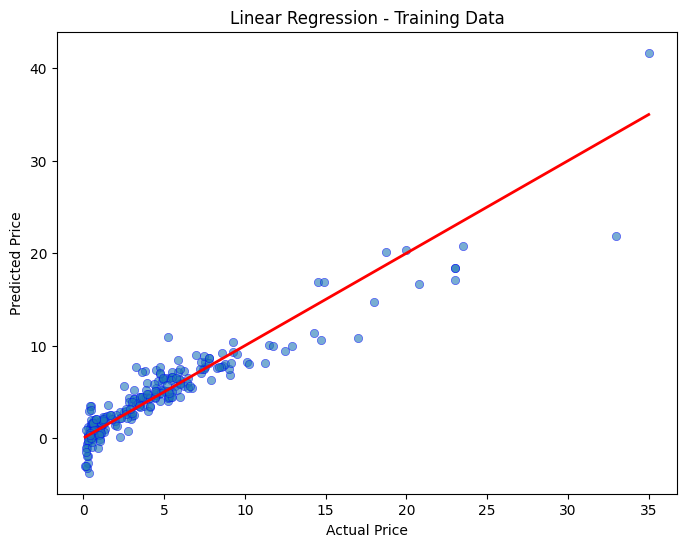

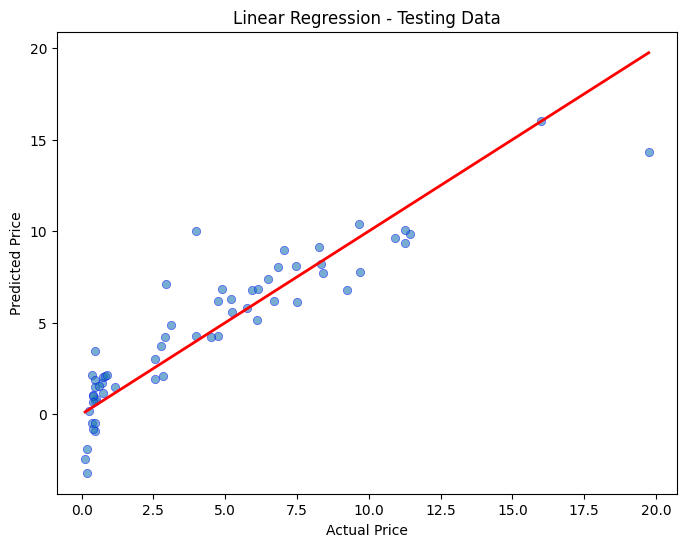

In [25]:
# Visualizing actual vs predicted prices for Linear Regression
visualize_predictions(Y_train, train_pred_lr, "Linear Regression - Training Data")
visualize_predictions(Y_test, test_pred_lr, "Linear Regression - Testing Data")


**MODEL 2 : LASSO REGRESSION**

In [26]:
print("\n--- Lasso Regression Model ---")
lass_reg_model = Lasso()
lass_reg_model.fit(X_train, Y_train)


--- Lasso Regression Model ---


Lasso()

In [27]:
# Evaluating Lasso Regression model
train_pred_lasso = lass_reg_model.predict(X_train)
test_pred_lasso = lass_reg_model.predict(X_test)


In [28]:
train_r2_lasso = metrics.r2_score(Y_train, train_pred_lasso)
test_r2_lasso = metrics.r2_score(Y_test, test_pred_lasso)

In [29]:
print("Training R-squared score:", train_r2_lasso)
print("Testing R-squared score:", test_r2_lasso)

Training R-squared score: 0.843587395258283
Testing R-squared score: 0.8497457570738539


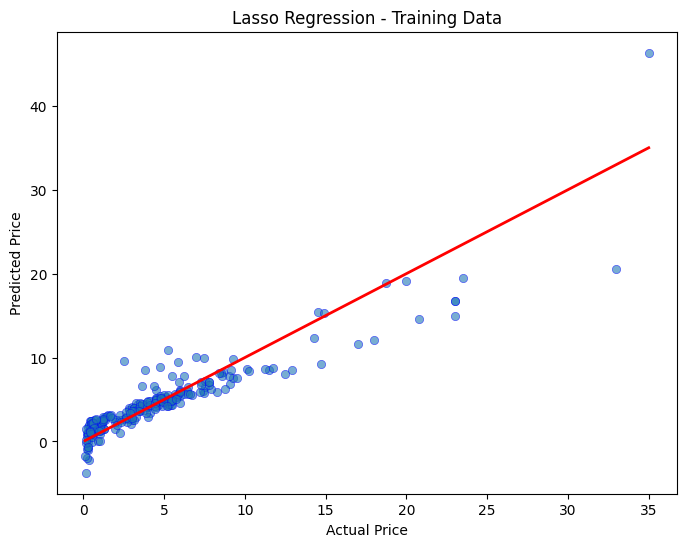

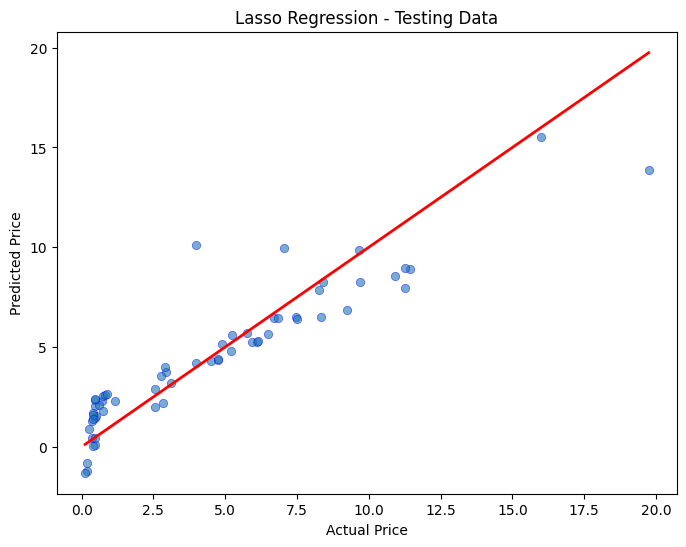

In [30]:
# Visualizing actual vs predicted prices for Lasso Regression
visualize_predictions(Y_train, train_pred_lasso, "Lasso Regression - Training Data")
visualize_predictions(Y_test, test_pred_lasso, "Lasso Regression - Testing Data")